In [2]:
## Creating Fundamental curve and maxwell mode elements from G' and G'' frequency sweeps.
# we first need to import required libraries
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.labelsize': 22})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 10})
mpl.rcParams.update({'ytick.labelsize': 10})

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np #Needed for a bunch of mathematical operations.

## Importing omega, G' and G'' data

In [3]:
import xlrd #Documentation on how to use xlrd @ https://openpyxl.readthedocs.io/en/stable/

## This part will require the user to diligently take data from 
#their experiment and set up the omega G' and G'' arrays properly

##Please send me an email if you need the data referenced in this cell
# I'm supposed to keep the origin of the data confidencial


#Extracting Data Experimental Data Excel File
workbook = xlrd.open_workbook('Practice_Data.xlsx')
#Setting up Model Parameters sheet
sheet_MP = workbook.sheet_by_name('LVE')

## Creating cell value range of the Maxwell Model Mode results
cell_range = sheet_MP.cell_value(2,3)
omega = np.zeros(21)
T160 = np.zeros((21,2))
T180 = np.zeros((21,2))
T200 = np.zeros((21,2))
T220 = np.zeros((21,2))
T240 = np.zeros((21,2))
T260 = np.zeros((21,2))
for i in range(0,2):
    for j in range(0,21):
        G160 = float(sheet_MP.cell_value(3+j,i+1))
        G180 = float(sheet_MP.cell_value(3+j,i+3))
        G200 = float(sheet_MP.cell_value(3+j,i+5))
        G220 = float(sheet_MP.cell_value(3+j,i+7))
        G240 = float(sheet_MP.cell_value(3+j,i+9))
        G260 = float(sheet_MP.cell_value(3+j,i+11))
        omega[j] = float(sheet_MP.cell_value(3+j,0))
        # Put the values in the matrices
        T160[j,i] = G160
        T180[j,i] = G180
        T200[j,i] = G200
        T220[j,i] = G220
        T240[j,i] = G240
        T260[j,i] = G260



## Creating the fundamental curve
First we need to make a fundamental curve by horizontally shifting the G' and G'' curves to a reference temperature.

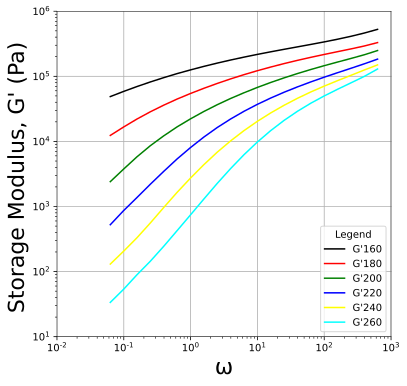

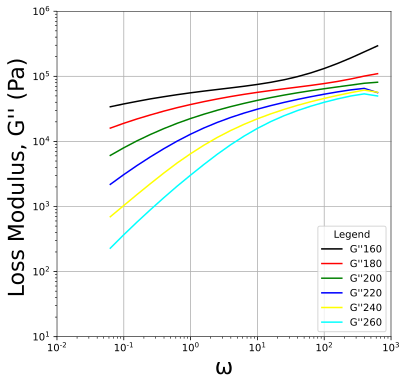

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot( omega, T160[:,0],  color='black', label='G\'160' )
ax.plot( omega, T180[:,0],  color='red', label='G\'180' )
ax.plot( omega, T200[:,0],  color='green', label='G\'200' )
ax.plot( omega, T220[:,0],  color='blue', label='G\'220' )
ax.plot( omega, T240[:,0],  color='yellow', label='G\'240' )
ax.plot( omega, T260[:,0],  color='cyan', label='G\'260' )
ax.set_xlabel('\u03C9')
ax.set_ylabel('Storage Modulus, G\' (Pa) ')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000, 10, 1e6])
#ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid()  

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot( omega, T160[:,1],  color='black', label='G\'\'160' )
ax.plot( omega, T180[:,1],  color='red', label='G\'\'180' )
ax.plot( omega, T200[:,1],  color='green', label='G\'\'200' )
ax.plot( omega, T220[:,1],  color='blue', label='G\'\'220' )
ax.plot( omega, T240[:,1],  color='yellow', label='G\'\'240' )
ax.plot( omega, T260[:,1],  color='cyan', label='G\'\'260' )
ax.set_xlabel('\u03C9')
ax.set_ylabel('Loss Modulus, G\'\' (Pa) ')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000, 10, 1e6])
#ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid()  


## Horizontal Shift of G' and G'' curves using the Arrhenius Equation to get the fundamental curve

667.3488656660431
84.78650587245313
12.82550381537667
2.2613825754960093
0.4565009762209928
0.10391108984882659


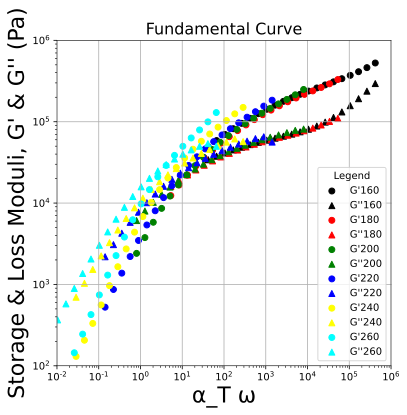

In [22]:
def HShift(T,Tref,dH,omega):
    aT = np.exp(dH*((1/(T+273))-(1/(Tref+273))))
    print(aT)
    return (omega*aT)
 
Tref=230
dH = 3647.805 #Fitted manually to give a Arrhenius constant.
dH = 40.21*1000/1.9872
T = 160
aT160 = HShift(T,Tref,dH,omega)
T =180
aT180 = HShift(T,Tref,dH,omega)
T=200
aT200 = HShift(T,Tref,dH,omega)
T=220
aT220 = HShift(T,Tref,dH,omega)
T=240
aT240 = HShift(T,Tref,dH,omega)
T=260
aT260 = HShift(T,Tref,dH,omega)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter( aT160, T160[:,0] , color='black', label='G\'160' )
ax.scatter( aT160, T160[:,1],marker = '^',  color='black', label='G\'\'160' )
ax.scatter( aT180, T180[:,0],  color='red', label='G\'180' )
ax.scatter( aT180, T180[:,1],marker = '^',  color='red', label='G\'\'180' )
ax.scatter( aT200, T200[:,0],  color='green', label='G\'200' )
ax.scatter( aT200, T200[:,1],marker = '^',  color='green', label='G\'\'200' )
ax.scatter( aT220, T220[:,0],  color='blue', label='G\'220' )
ax.scatter( aT220, T220[:,1],marker = '^',  color='blue', label='G\'\'220' )
ax.scatter( aT240, T240[:,0],  color='yellow', label='G\'240' )
ax.scatter( aT240, T240[:,1],marker = '^',  color='yellow', label='G\'\'240' )
ax.scatter( aT260, T260[:,0],  color='cyan', label='G\'260' )
ax.scatter( aT260, T260[:,1],marker = '^',  color='cyan', label='G\'\'260' )
ax.set_xlabel('\u03B1_T \u03C9')
ax.set_ylabel('Storage & Loss Moduli, G\' & G\'\' (Pa)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis([0.01, 1000000, 100, 1e6])
ax.set_title('Fundamental Curve')
ax.legend(loc='best',title='Legend')
ax.grid()  

## Fitting maxwell model

In [6]:
#Appending all the data together.

Gp = np.append(np.append(np.append(np.append(np.append(T160[:,0],T180[:,0]),T200[:,0]),T220[:,0]),T240[:,0]),T260[:,0])
Gpp = np.append(np.append(np.append(np.append(np.append(T160[:,1],T180[:,1]),T200[:,1]),T220[:,1]),T240[:,1]),T260[:,1])
OmegaA = np.append(np.append(np.append(np.append(np.append(aT160,aT180),aT200),aT220),aT240),aT260)


In [12]:
## Calculating Gi and Lambdai

N = int(input('Input the number of modes for the fluid')) ## Asks user how many modes they want for the calculation.
n = len(OmegaA)
OmegaMax = np.amax(OmegaA)
OmegaMin = np.amin(OmegaA)
lambdA = np.linspace(np.log10(1/OmegaMax),np.log10(1/OmegaMin),N)
lambdA = 10**lambdA

alpha = np.zeros((N,n))
beta = np.zeros((N,n))

for i in range(0,N):
    for j in range(0,n):
        alpha[i,j] = (OmegaA[j]*(lambdA[i])**2)/(Gp[j]*(1+(OmegaA[j]*(lambdA[i])**2)))
        beta[i,j] = (OmegaA[j]*(lambdA[i]))/(Gpp[j]*(1+(OmegaA[j]*(lambdA[i])**2)))
b = np.zeros(N)
A = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,n):
        b[i] = b[i] + alpha[i,j] + beta[i,j]
    for k in range(0,N):
        for j in range(0,n):
            A[i,k] = A[i,k] + (alpha[i,j]*alpha[k,j]) + (beta[i,j]*beta[k,j])

G = np.zeros(N)
Ainv = np.linalg.inv(A)
G = np.matmul(Ainv,b)

    
## Which gives the G and lambda arrays for the Maxwell relaxation moduli. Which can be used in the KBKZ_Final Notebook.


Input the number of modes for the fluid 6
